**Install required packages**

Includes Pandas and Sklearn package

In [1]:
%%capture
import sys
!{sys.executable} -m pip install -U pandas-profiling[notebook]
!jupyter nbextension enable --py widgetsnbextension
!pip install matplotlib
!pip install graphviz

⬛ **Read data csv file and display attributs and types** ⬛

In [3]:
from google.colab import files
uploaded = files.upload()

Saving Final_COVID_DataSet.csv to Final_COVID_DataSet.csv


In [4]:
import pandas as pd
import numpy as np

df = pd.read_csv ('Final_COVID_DataSet.csv')
print(df.dtypes)

Outbreak_Associated      int64
Age_Group                int64
Source_of_Infection      int64
Gender                   int64
Ever_Hospitalized        int64
Ever_in_ICU              int64
Ever_Intubated           int64
Outcome                float64
dtype: object


⬛ **Converting data types from Numeric to Categorical** ⬛ 

In [ ]:
for col in df.columns:
  df[col] = df[col].astype(str)
print(df.dtypes)

Outbreak_Associated    object
Age_Group              object
Source_of_Infection    object
Gender                 object
Ever_Hospitalized      object
Ever_in_ICU            object
Ever_Intubated         object
Outcome                object
dtype: object


In [ ]:
#Meta information about data, such as null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 332764 entries, 0 to 332763
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Outbreak_Associated  332764 non-null  object
 1   Age_Group            332764 non-null  object
 2   Source_of_Infection  332764 non-null  object
 3   Gender               332764 non-null  object
 4   Ever_Hospitalized    332764 non-null  object
 5   Ever_in_ICU          332764 non-null  object
 6   Ever_Intubated       332764 non-null  object
 7   Outcome              332764 non-null  object
dtypes: object(8)
memory usage: 20.3+ MB


⬛ **Develop Decison Tree Model** ⬛

In [ ]:
# First split the data into train and test set
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
# Our class column is Creditability here and everything else will be used as features 
class_col_name='Outcome' 

feature_names=df.columns[df.columns != class_col_name ]
# 70% training and 30% test
X_train, X_test, y_train, y_test = train_test_split(df.loc[:, feature_names], df[class_col_name], test_size=0.3,random_state=1) 

Max depth of the tree to 8

In [ ]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth=8)
clf = clf.fit(X_train, y_train)
print("Successfuly trained the decision tree...")

Successfuly trained the decision tree...


Plot the tree

class Names ['1.0' '2.0']


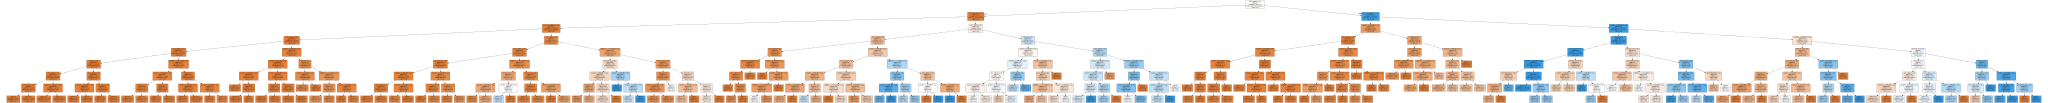

In [ ]:
import graphviz
#Get unique class values to display on the tree
class_values=df[class_col_name].unique()
print ("class Names",class_values)


dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=feature_names,  
                                class_names=class_values,
                                filled=True)
# Plot tree
graph = graphviz.Source(dot_data, format="png") 
graph



In [ ]:
# make the prdictions on the test set  that we set aside earlier using the trained tree
y_pred = clf.predict(X_test)


Print confusion matrix for Decision Tree.

Confusion Matrix
[[49708   272]
 [  804 49046]]
TP:  49046 , FP:  272 , TN:  49708 , FN: 804


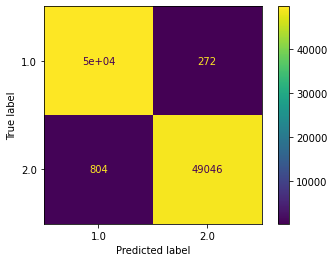

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cf=confusion_matrix(y_test, y_pred, labels=clf.classes_)
print ("Confusion Matrix")

print(cf)
tn, fp, fn, tp=cf.ravel()
print ("TP: ", tp,", FP: ", fp,", TN: ", tn,", FN:", fn)

disp = ConfusionMatrixDisplay(confusion_matrix=cf, display_labels=clf.classes_)
disp.plot()


In [ ]:
#print precision, recall, and accuracy from the perspective of each of the class
from sklearn.metrics import classification_report
from sklearn import metrics

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         1.0       0.98      0.99      0.99     49980
         2.0       0.99      0.98      0.99     49850

    accuracy                           0.99     99830
   macro avg       0.99      0.99      0.99     99830
weighted avg       0.99      0.99      0.99     99830



⬛ **Analysis using Naive Bayes** ⬛

In [ ]:
from sklearn.naive_bayes import MultinomialNB

#Create a MultiNomial NB Classifier
nb = MultinomialNB()

#Train the model using the training sets
nb.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = nb.predict(X_test)

In [ ]:
print ("Total Columns (including class)",len(df.columns))

Total Columns (including class) 8


Naive Bayes model confusion matrix

In [ ]:
print("Number of features used ",nb.n_features_)
print("Classes ",nb.classes_)
print("Number of records for classes ",nb.class_count_)
print("Log prior probability for classes ", nb.class_log_prior_)
print("Log conditional probability for each feature given a class\n",nb.feature_log_prob_)

Number of features used  7
Classes  ['1.0' '2.0']
Number of records for classes  [116402. 116532.]
Log prior probability for classes  [-0.69370543 -0.69258924]
Log conditional probability for each feature given a class
 [[-1.69918461 -1.05599527 -1.15407007 -1.9129253  -5.27138778 -7.14791501
  -7.82421969]
 [-1.95504247 -0.56413439 -1.92301962 -2.63055209 -2.64945498 -7.82516404
  -8.1241225 ]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:103: FutureWarning: Attribute `n_features_` was deprecated in version 1.0 and will be removed in 1.2. Use `n_features_in_` instead.
  warnings.warn(msg, category=FutureWarning)


Confusion Matrix
[[45957  4023]
 [  473 49377]]
TP:  49377 , FP:  4023 , TN:  45957 , FN: 473


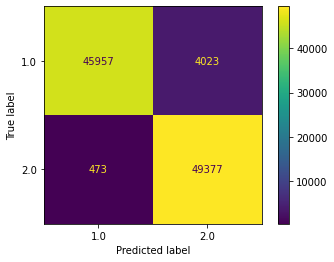

In [ ]:
cf=confusion_matrix(y_test, y_pred)
print ("Confusion Matrix")
print(cf)
tn, fp, fn, tp=cf.ravel()
print ("TP: ", tp,", FP: ", fp,", TN: ", tn,", FN:", fn)

disp = ConfusionMatrixDisplay(confusion_matrix=cf, display_labels=clf.classes_)
disp.plot()

In [ ]:

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

         1.0       0.99      0.92      0.95     49980
         2.0       0.92      0.99      0.96     49850

    accuracy                           0.95     99830
   macro avg       0.96      0.96      0.95     99830
weighted avg       0.96      0.95      0.95     99830



⬛ **Random Forest** ⬛

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(df.loc[:, feature_names], df[class_col_name], train_size=0.7,random_state=42) 
X_train.shape, X_test.shape

from sklearn.ensemble import RandomForestClassifier
classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=7,
                                       n_estimators=100, oob_score=True)

classifier_rf.fit(X_train, y_train)


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


RandomForestClassifier(max_depth=7, n_jobs=-1, oob_score=True, random_state=42)

Confusion Matrix
[[23198 26692]
 [23232 26708]]
TP:  26708 , FP:  26692 , TN:  23198 , FN: 23232


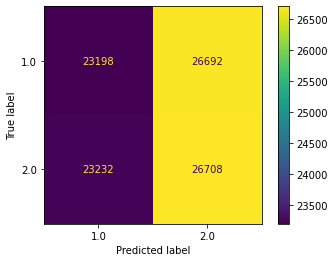

In [ ]:
cf=confusion_matrix(y_test, y_pred)
print ("Confusion Matrix")
print(cf)
tn, fp, fn, tp=cf.ravel()
print ("TP: ", tp,", FP: ", fp,", TN: ", tn,", FN:", fn)

disp = ConfusionMatrixDisplay(confusion_matrix=cf, display_labels=clf.classes_)
disp.plot()

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         1.0       0.50      0.46      0.48     49890
         2.0       0.50      0.53      0.52     49940

    accuracy                           0.50     99830
   macro avg       0.50      0.50      0.50     99830
weighted avg       0.50      0.50      0.50     99830

